# CaseStudy_Review2_19AI704

All the studies done here are based on Financial Sector. The datasets used are FinancialPhraseBank, IBM Stock Market Data, Online Retail purchase data and credit card purchase history.

## SENTIMENT ANALYSIS

Finanacial Sentiment Analysis is requied to understand the general opinion of news headlines, which in turn could impact stock price, company decisions ..etc.

Dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor. The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral or positive(3 - Categories).

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/Finanacial_News_Sentiment.csv"

df = pd.read_csv(url, encoding='ISO-8859-1', names=["sentiment", "text"])

df.head(5)

sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...

In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 9692
Shape of the data frame is (4846, 2)
No of Rows =  4846
No of Columns =  2


sentiment                                               text
count       4846                                               4846
unique         3                                               4838
top      neutral  The Group 's business is balanced by its broad...
freq        2879                                                  2

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


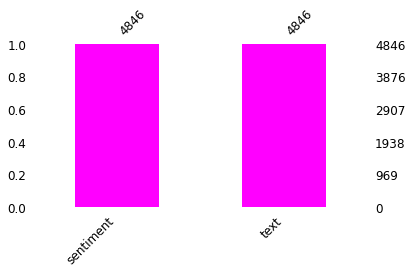

In [3]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

No missing values

#### Sentiment Analysis

In [4]:
# Balance of classes
class_dist = df['sentiment'].value_counts(normalize=True)
class_dist

neutral     0.594098
positive    0.281263
negative    0.124639
Name: sentiment, dtype: float64

<ipython-input-5-5eca73bb077c>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(class_dist.values, labels = class_dist.index,


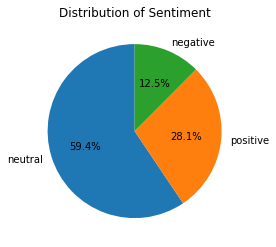

In [5]:
plt.pie(class_dist.values, labels = class_dist.index, 
        startangle=90, autopct='%1.1f%%')

plt.title('Distribution of Sentiment')
plt.show()

In [6]:
temp = []
#Splitting pd.Series to list
data_to_list = df['text'].values.tolist()

for i in range(len(data_to_list)):
    temp.append(data_to_list[i])

    list(temp[:5])

In [7]:
# ! pip install python-Levenshtein

In [8]:
# Basic Preprocessing to remove punctuation
import gensim

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:2])

C:\Users\athul\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[['according', 'to', 'gran', 'the', 'company', 'has', 'no', 'plans', 'to', 'move', 'all', 'production', 'to', 'russia', 'although', 'that', 'is', 'where', 'the', 'company', 'is', 'growing'], ['technopolis', 'plans', 'to', 'develop', 'in', 'stages', 'an', 'area', 'of', 'no', 'less', 'than', 'square', 'meters', 'in', 'order', 'to', 'host', 'companies', 'working', 'in', 'computer', 'technologies', 'and', 'the', 'statement', 'said']]


In [9]:
#combine tokens to genetate sentences
from nltk.tokenize.treebank import TreebankWordDetokenizer

def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [10]:
data = []

for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
    
print(data[:2])

['according to gran the company has no plans to move all production to russia although that is where the company is growing', 'technopolis plans to develop in stages an area of no less than square meters in order to host companies working in computer technologies and the statement said']


In [11]:
data = np.array(data)

In [12]:
import tensorflow as tf

labels = np.array(df['sentiment'])

y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
        
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [13]:
len(labels)

4846

In [14]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

max_words = 5000
max_len = 200

#Toeknise and pad sequence.
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
info = pad_sequences(sequences, maxlen=max_len)
print(info)

[[   0    0    0 ...    9    8  678]
 [   0    0    0 ...    1  843   18]
 [   0    0    0 ...  796 4568  214]
 ...
 [   0    0    0 ...    2    6   14]
 [   0    0    0 ...   11    6   14]
 [   0    0    0 ...   31  870   17]]


In [15]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [16]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(info, labels, test_size = 0.2, random_state=42)

print (len(X_train),len(X_test),len(Y_train),len(Y_test))

3876 970 3876 970


In [17]:
#Define model
model = Sequential()
model.add(layers.Embedding(max_words, 20))
model.add(layers.LSTM(15, dropout=0.5))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', metrics=['accuracy'])

# Checkpoints
checkpoint = ModelCheckpoint("best_model.hdf5", 
                              monitor='val_accuracy', 
                              verbose=1,save_best_only=True,
                              mode='auto', period=1,
                              save_weights_only=False)

history = model.fit(X_train, Y_train, 
                     epochs = 25,validation_data=(X_test, Y_test),
                     callbacks=[checkpoint])

Epoch 1/25
122/122 [==============================] - 18s 117ms/step - loss: 0.9749 - accuracy: 0.5914 - val_loss: 0.8411 - val_accuracy: 0.6268

Epoch 00001: val_accuracy improved from -inf to 0.62680, saving model to best_model.hdf5
Epoch 2/25
122/122 [==============================] - 11s 88ms/step - loss: 0.8169 - accuracy: 0.6454 - val_loss: 0.8795 - val_accuracy: 0.6495

Epoch 00002: val_accuracy improved from 0.62680 to 0.64948, saving model to best_model.hdf5
Epoch 3/25
122/122 [==============================] - 11s 89ms/step - loss: 0.7472 - accuracy: 0.6751 - val_loss: 0.8202 - val_accuracy: 0.6804

Epoch 00003: val_accuracy improved from 0.64948 to 0.68041, saving model to best_model.hdf5
Epoch 4/25
122/122 [==============================] - 11s 92ms/step - loss: 0.6594 - accuracy: 0.7231 - val_loss: 0.6906 - val_accuracy: 0.6990

Epoch 00004: val_accuracy improved from 0.68041 to 0.69897, saving model to best_model.hdf5
Epoch 5/25
122/122 [==============================] - 

In [18]:
import keras

# load the saved model.
best_model = keras.models.load_model("best_model.hdf5")

In [118]:
test_loss, test_acc = best_model.evaluate(X_test, Y_test, verbose=2)

print('Model accuracy: ', test_acc)

31/31 - 1s - loss: 0.7025 - accuracy: 0.7814
Model accuracy:  0.7814432978630066


In [20]:
predictions = best_model.predict(X_test)
predictions

array([[0.89213073, 0.00729747, 0.10057181],
       [0.9926311 , 0.0014404 , 0.00592854],
       [0.12476741, 0.057917  , 0.81731564],
       ...,
       [0.94570804, 0.01306241, 0.04122953],
       [0.01108382, 0.00276111, 0.9861551 ],
       [0.97782284, 0.00183844, 0.02033869]], dtype=float32)

In [21]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test.argmax(axis=1), 
                          np.around(predictions, decimals=0).argmax(axis=1))
matrix

array([[514,   7,  50],
       [ 32,  59,  19],
       [101,   5, 183]], dtype=int64)

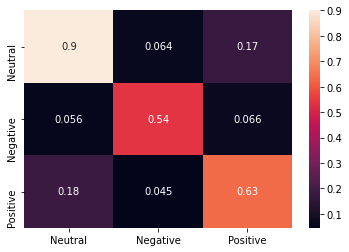

In [22]:
import seaborn as sns

conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],
                           columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)
plt.figure()
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [23]:
sentiment = ['Neutral','Negative','Positive']

In [24]:
sequence = tokenizer.texts_to_sequences(['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Positive'

In [25]:
sequence = tokenizer.texts_to_sequences(['The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Negative'

In [26]:
sequence = tokenizer.texts_to_sequences(['According to Gran , the company has no plans to move all production to Russia'])
test = pad_sequences(sequence, maxlen=max_len)

sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'Neutral'

## CLUSTERING

Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.

Dataset URL : https://www.kaggle.com/arjunbhasin2013/ccdata

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/Creidit_Card.csv"

df = pd.read_csv(url)

df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [28]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 161100
Shape of the data frame is (8950, 18)
No of Rows =  8950
No of Columns =  18


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


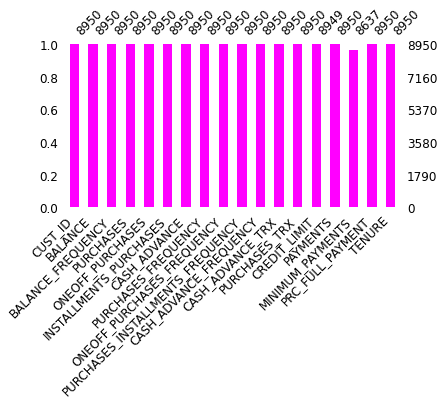

In [29]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

In [30]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 314


In [31]:
# Get rows where the data is missing
null_data = df[df.isnull().any(axis=1)]
null_data.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   C10004  1666.670542           0.636364     1499.0            1499.0   
45  C10047  2242.311686           1.000000      437.0              97.0   
47  C10049  3910.111237           1.000000        0.0               0.0   
54  C10056     6.660517           0.636364      310.0               0.0   
55  C10057  1311.995984           1.000000     1283.9            1283.9   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                      0.0    205.788017             0.083333   
45                   340.0    184.648692             0.333333   
47                     0.0   1980.873201             0.000000   
54                   310.0      0.000000             0.666667   
55                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                     0.083333                          0.000000   
45                    0.083333                          0.333333   
47                    0.000000                          0.000000   
54                    0.000000                          0.666667   
55                    0.250000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.083333                 1              1        7500.0   
45                0.166667                 2              5        2400.0   
47                0.500000                 7              0        4200.0   
54                0.000000                 0              8        1000.0   
55                0.000000                 0              6        6000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3     0.000000               NaN               0.0      12  
45    0.000000               NaN               0.0      12  
47    0.000000               NaN               0.0      12  
54  417.016763               NaN               0.0      12  
55    0.000000               NaN               0.0      12

In [32]:
df = df.dropna()
null_data = df[df.isnull().any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

### EDA

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (8950, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  14
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0

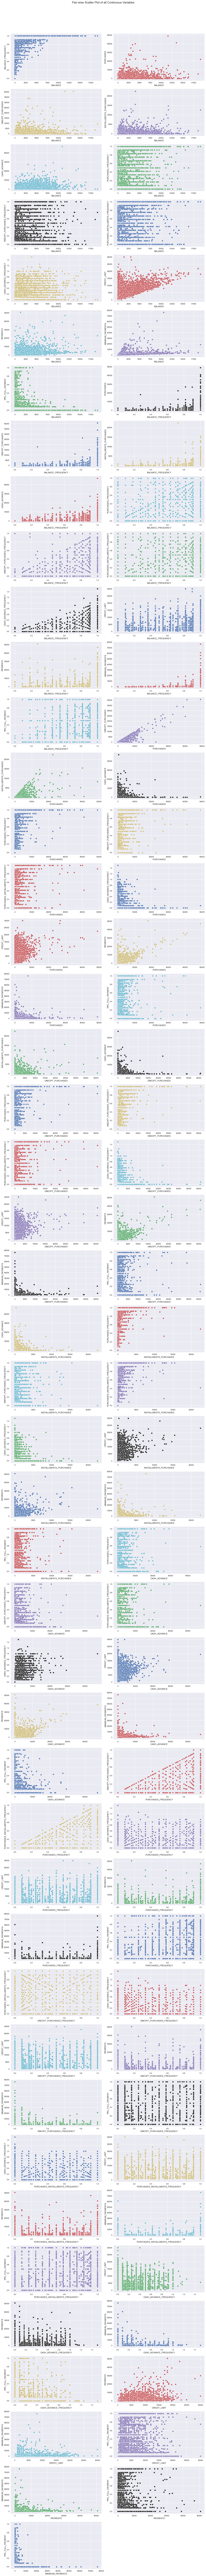

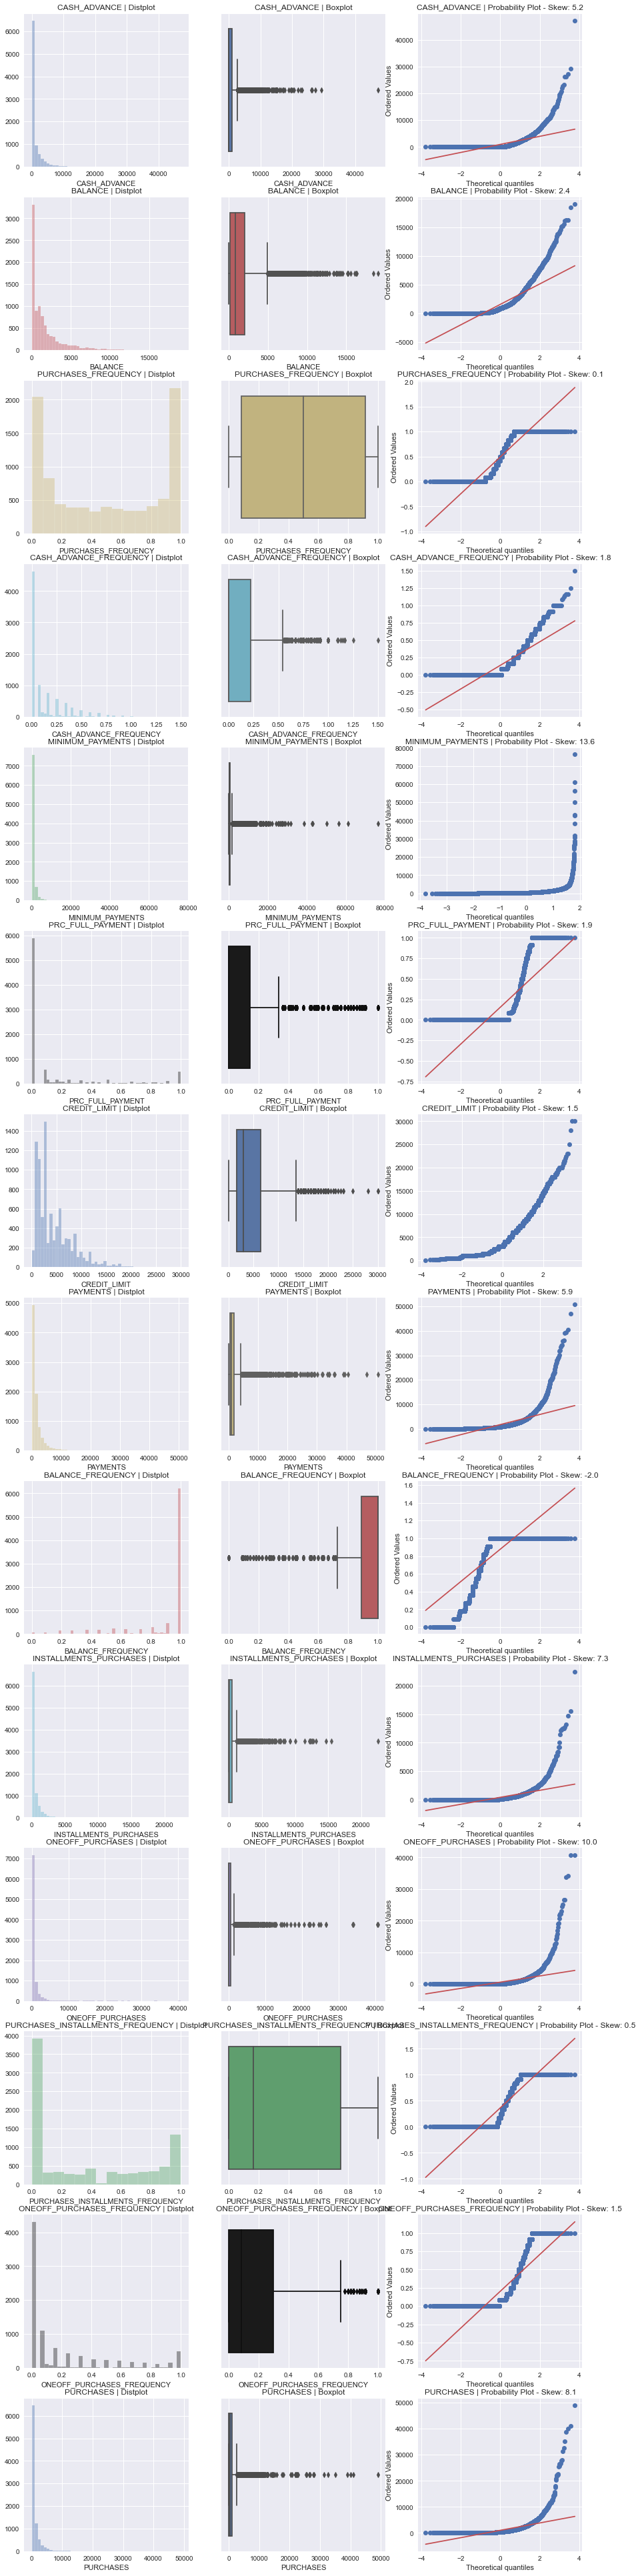

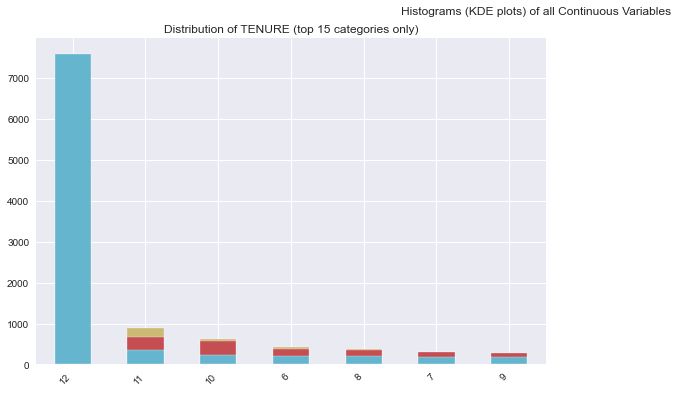

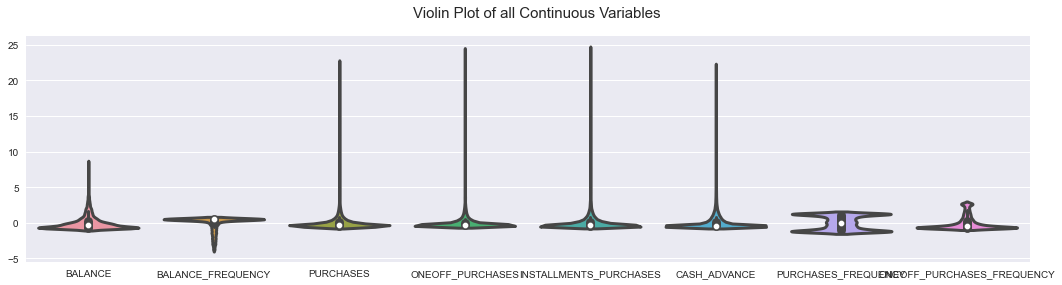

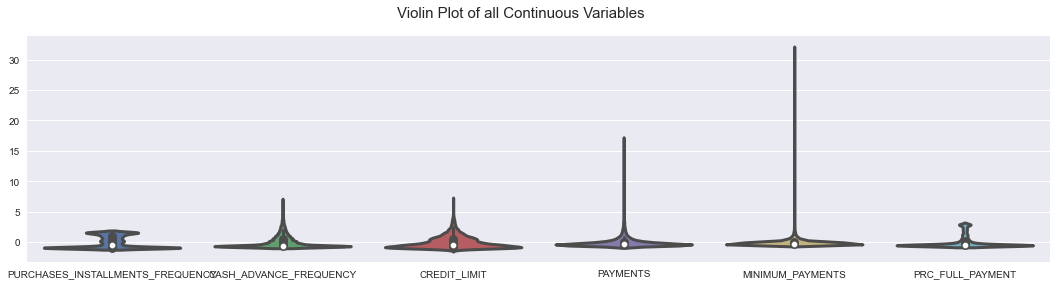

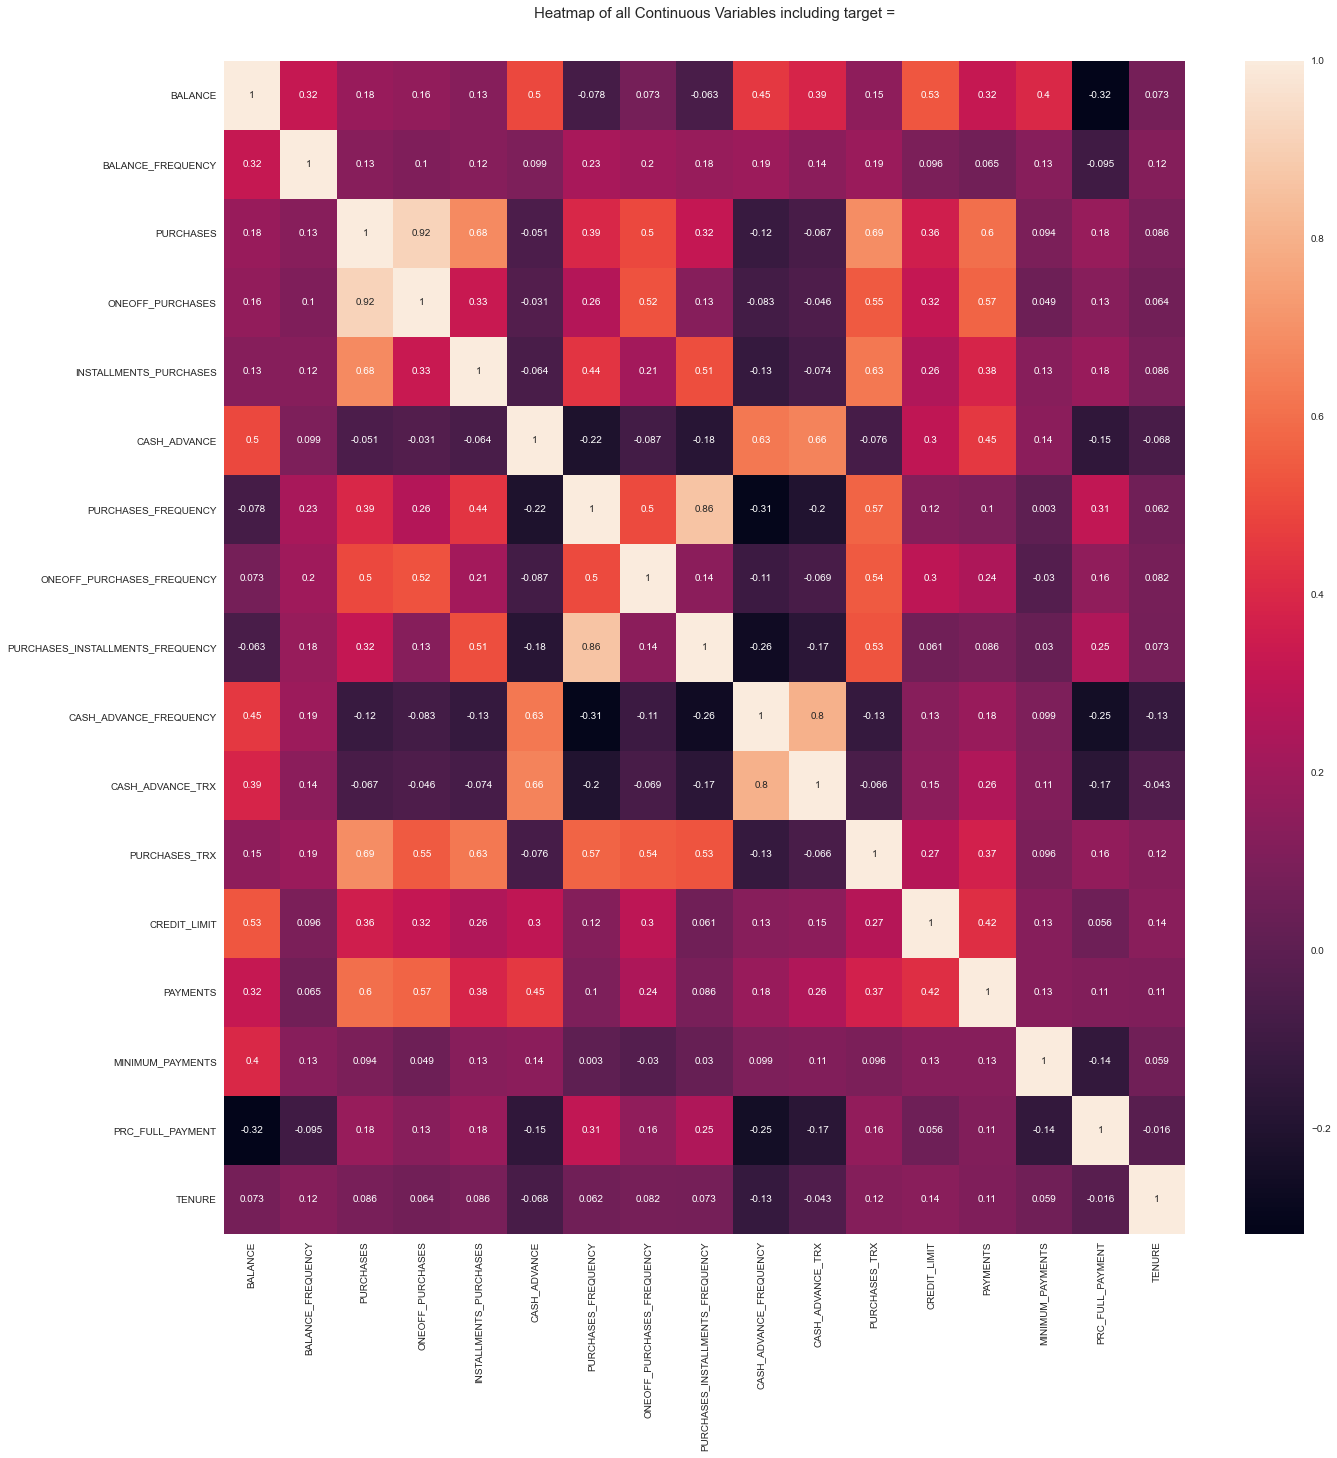

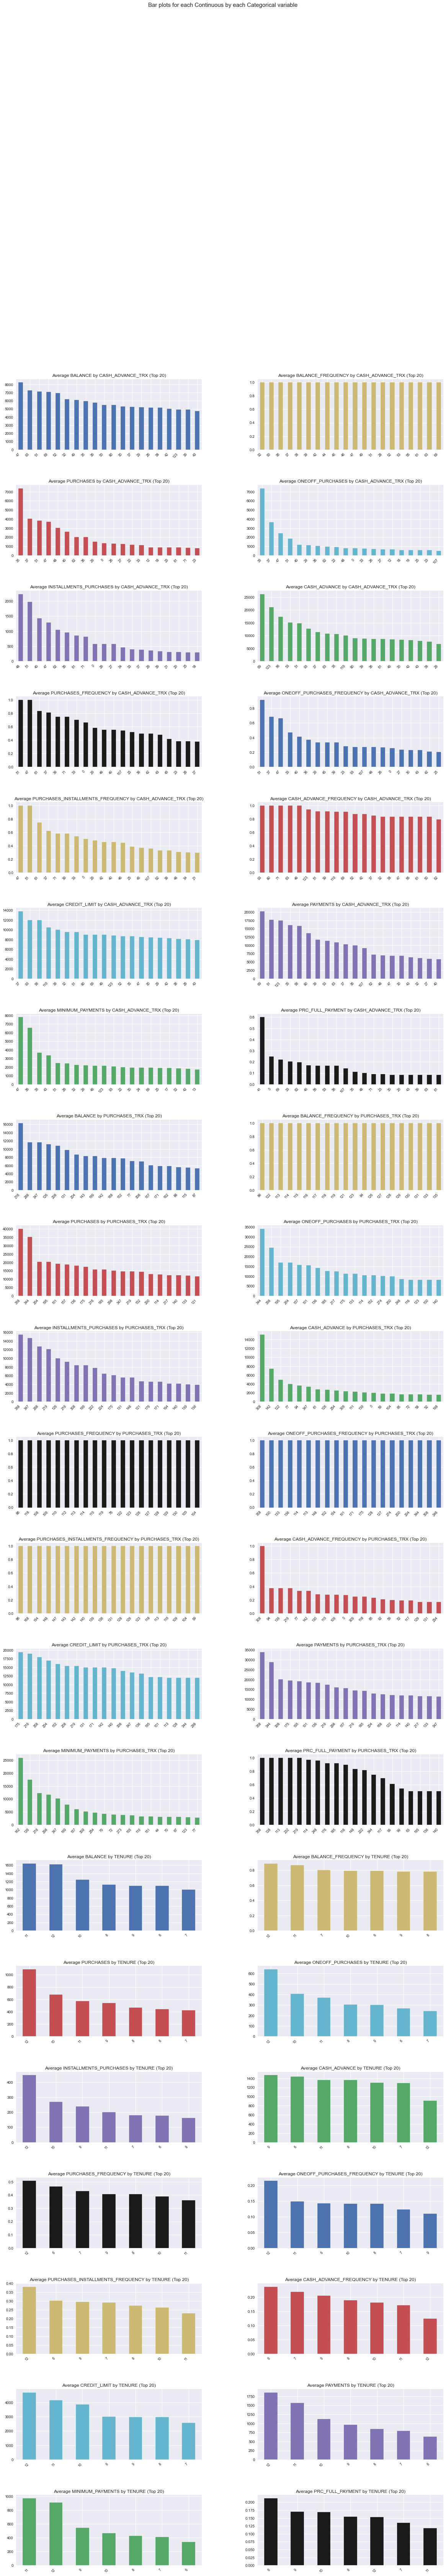

Time to run AutoViz (in seconds) = 92.466

 ###################### VISUALIZATION Completed ########################


In [33]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

### Analysis

In [34]:
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

In [35]:
X = np.asarray(df)

In [36]:
from sklearn.preprocessing import StandardScaler

#standard scaler
scale = StandardScaler()

X = scale.fit_transform(X)
X.shape

(8636, 17)

In [37]:
from sklearn.cluster import KMeans

cost=[]
n_clusters = 30

for i in range(1, n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

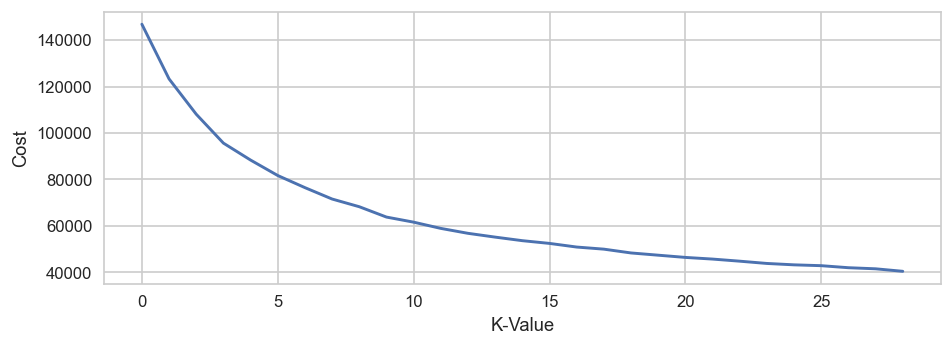

In [112]:
import matplotlib.pyplot as plt

plt.plot(cost, 'bx-')
plt.xlabel("K-Value")
plt.ylabel("Cost")
plt.show()

We can choose k value to be 6

In [39]:
kmean= KMeans(6)
kmean.fit(X)

kmean.labels_

array([3, 0, 2, ..., 1, 3, 3])

In [40]:
clusters = pd.concat([df, pd.DataFrame({'cluster':kmean.labels_})], axis=1)
clusters.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3          NaN                NaN        NaN               NaN   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     NaN           NaN                  NaN   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                         NaN                               NaN   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00               0.0            2.0        1000.0   
1                    0.25               4.0            0.0        7000.0   
2                    0.00               0.0           12.0        7500.0   
3                     NaN               NaN            NaN           NaN   
4                    0.00               0.0            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000    12.0      3.0  
1  4103.032597       1072.340217          0.222222    12.0      0.0  
2   622.066742        627.284787          0.000000    12.0      2.0  
3          NaN               NaN               NaN     NaN      3.0  
4   678.334763        244.791237          0.000000    12.0      1.0

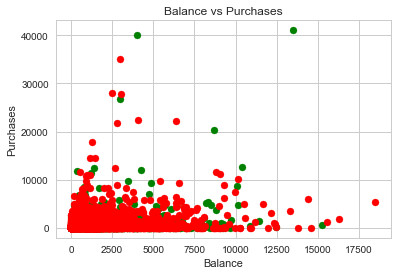

In [41]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.title("Balance vs Purchases")
plt.xlabel('Balance')
plt.ylabel('Purchases')

plt.scatter("BALANCE", "PURCHASES", data = clusters[clusters.cluster == 0], color = "green")
plt.scatter("BALANCE", "PURCHASES", data = clusters[clusters.cluster == 1], color = "red")

plt.show()

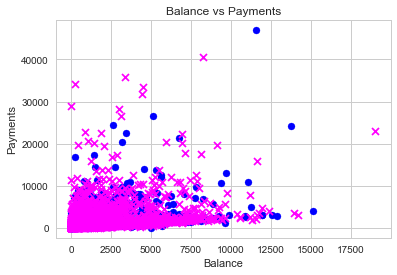

In [42]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.title("Balance vs Payments")
plt.xlabel('Balance')
plt.ylabel('Payments')

plt.scatter("BALANCE", "PAYMENTS", data = clusters[clusters.cluster == 2], color = "blue")
plt.scatter("BALANCE", "PAYMENTS", data = clusters[clusters.cluster == 3], color = "magenta", marker="x" )

plt.show()

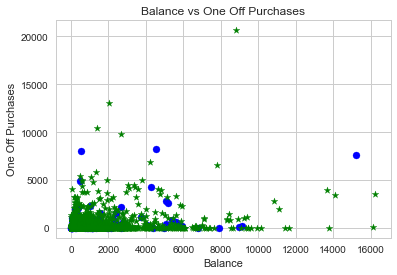

In [43]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.title("Balance vs One Off Purchases")
plt.xlabel('Balance')
plt.ylabel('One Off Purchases')

plt.scatter("BALANCE", "ONEOFF_PURCHASES", data = clusters[clusters.cluster == 4], color = "blue")
plt.scatter("BALANCE", "ONEOFF_PURCHASES", data = clusters[clusters.cluster == 5], color = "green", marker="*" )


plt.show()

### Gaussian Mixtures

In [44]:
from sklearn.mixture import GaussianMixture

y_pred  = GaussianMixture(n_components = 6, random_state=42).fit(X).predict(X)
mapping = np.array([0, 1, 2, 3, 4, 5])

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([3, 5, 4, ..., 3, 5, 2])

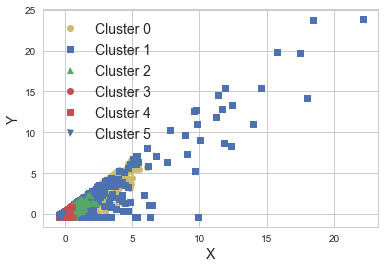

In [45]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 0")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 1")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 2")
plt.plot(X[y_pred==3, 2], X[y_pred==3, 3], "ro", label="Cluster 3")
plt.plot(X[y_pred==4, 2], X[y_pred==4, 3], "rs", label="Cluster 4")
plt.plot(X[y_pred==5, 2], X[y_pred==5, 3], "v", label="Cluster 5")

plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)

plt.show()

### Hopkins Test

In [93]:
# ! pip install pyclustertend

In [47]:
from pyclustertend import hopkins

In [96]:
print(X.shape[0])
hopkins(X, X.shape[0])

8636


0.03559142125881846

The null hypothesis (no meaningfull cluster) happens when the hopkins test is around 0.5 
and the hopkins test tends to 0 when meaningful cluster exists in the space. 
Usually, we can believe in the existence of clusters when the hopkins score is bellow 0.25

Here the value is 0.035 which is very much close to zero implying that the data has significant clustering tendencies.

## MARKET BASKET ANALYSIS/Association Rule Mining

Data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/E-Commerce_Market_Basket.csv"

df = pd.read_csv(url, encoding='ISO-8859-1')
# df = pd.read_csv(url, encoding='ISO-8859-1', nrows=60000)

df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [50]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 4335272
Shape of the data frame is (541909, 8)
No of Rows =  541909
No of Columns =  8


Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Handling Missing Data points

AxesSubplot(0.125,0.125;0.775x0.755)


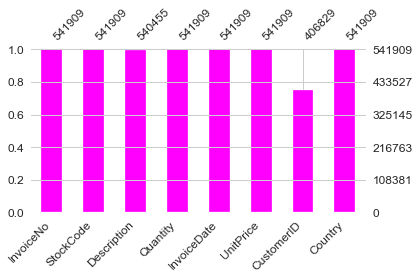

In [51]:
missing_bar  = msno.bar(df, figsize=(6, 3), fontsize=12, color='magenta')

print(missing_bar)

Customer ID's are not important so lets just ignore them.

### EDA

File encoding decoder utf-8 does not work for this file
Shape of your Data Set: (541909, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables
Since Number of Rows in data 541909 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 3


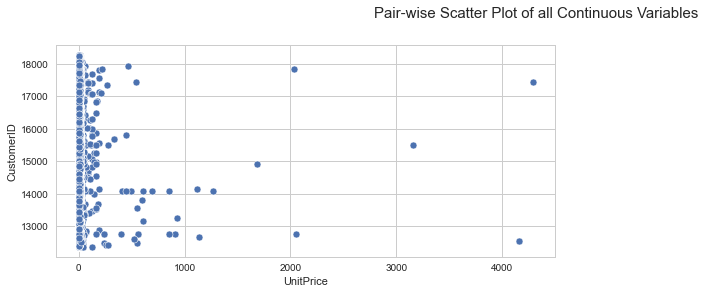

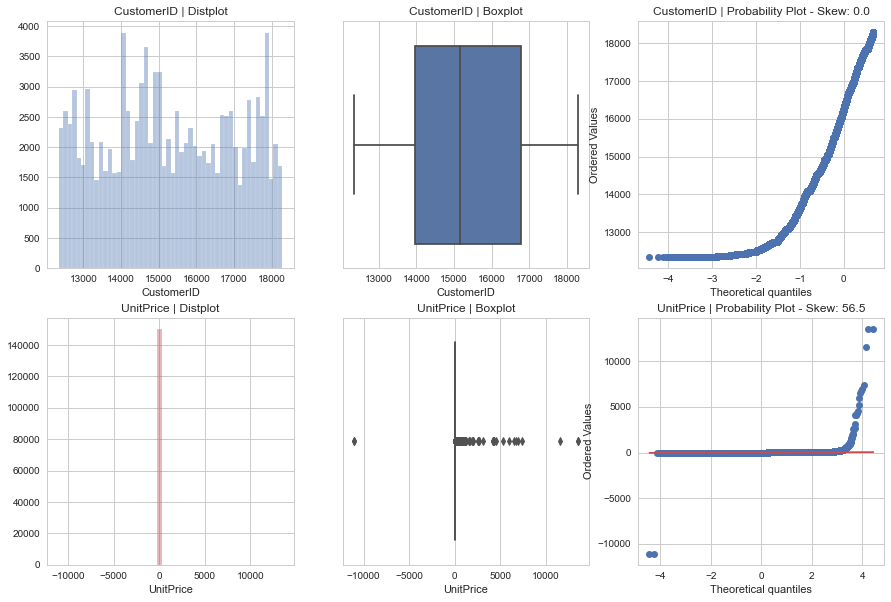

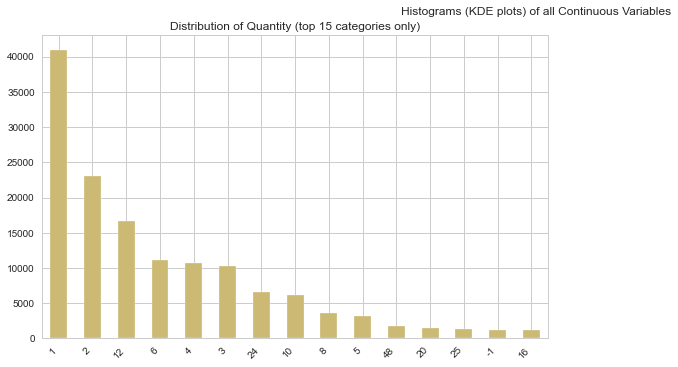

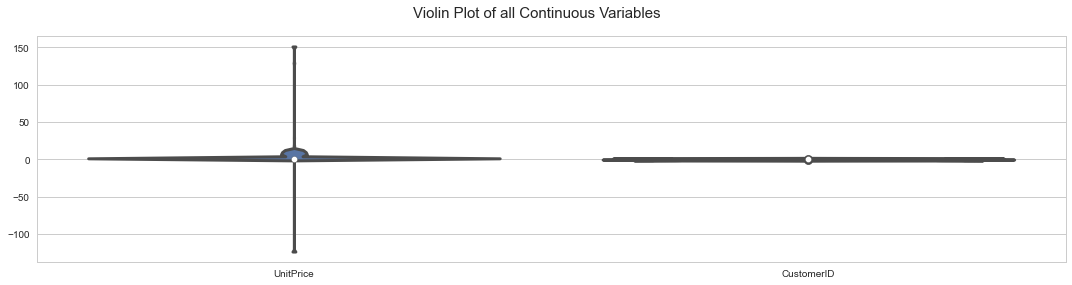

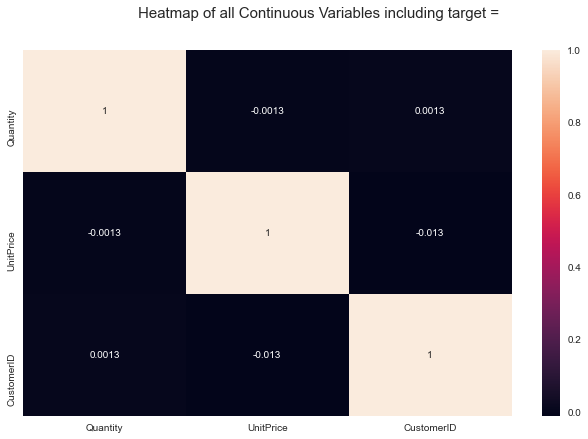

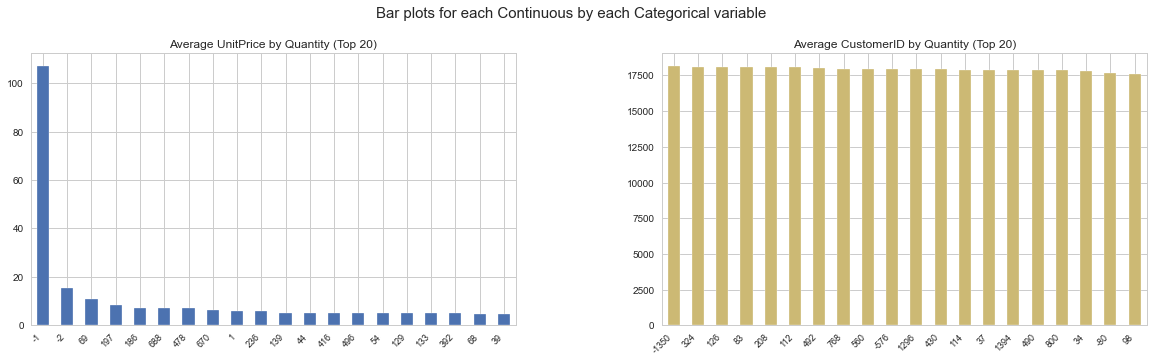

Time to run AutoViz (in seconds) = 59.039

 ###################### VISUALIZATION Completed ########################


In [52]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

### Preprocessing

In [53]:
df.drop("StockCode", axis=1, inplace=True)
df.drop("InvoiceDate", axis=1, inplace=True)
df.drop("UnitPrice", axis=1, inplace=True)
df.drop("CustomerID", axis=1, inplace=True)
df.head(5)

InvoiceNo                          Description  Quantity         Country
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6  United Kingdom
1    536365                  WHITE METAL LANTERN         6  United Kingdom
2    536365       CREAM CUPID HEARTS COAT HANGER         8  United Kingdom
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  United Kingdom
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6  United Kingdom

In [54]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [55]:
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

print(basket.shape)
basket.head()

(603, 1703)


Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536527                                  0.0                 0.0   
536840                                  0.0                 0.0   
536861                                  0.0                 0.0   
536967                                  0.0                 0.0   
536983                                  0.0                 0.0   

Description   I LOVE LONDON MINI BACKPACK   RED SPOT GIFT BAG LARGE  \
InvoiceNo                                                             
536527                                0.0                       0.0   
536840                                0.0                       0.0   
536861                                0.0                       0.0   
536967                                0.0                       0.0   
536983                                0.0                       0.0   

Description   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET  \
InvoiceNo                                                                
536527                                    0.0                      0.0   
536840                                    0.0                      0.0   
536861                                    0.0                      0.0   
536967                                    0.0                      0.0   
536983                                    0.0                      0.0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  ...  \
InvoiceNo                                     ...   
536527                                   0.0  ...   
536840                                   0.0  ...   
536861                                   0.0  ...   
536967                                   0.0  ...   
536983                                   0.0  ...   

Description  YULETIDE IMAGES GIFT WRAP SET  ZINC  HEART T-LIGHT HOLDER  \
InvoiceNo                                                                
536527                                 0.0                         0.0   
536840                                 0.0                         0.0   
536861                                 0.0                         0.0   
536967                                 0.0                         0.0   
536983                                 0.0                         0.0   

Description  ZINC  STAR T-LIGHT HOLDER   ZINC BOX SIGN HOME  \
InvoiceNo                                                     
536527                              0.0                 0.0   
536840                              0.0                 0.0   
536861                              0.0                 0.0   
536967                              0.0                 0.0   
536983                              0.0                 0.0   

Description  ZINC FOLKART SLEIGH BELLS  ZINC HEART LATTICE T-LIGHT HOLDER  \
InvoiceNo                                                                   
536527                             0.0                                0.0   
536840                             0.0                                0.0   
536861                             0.0                    

In [56]:
def encode_order(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_order)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [57]:
# ! pip install mlxtend

In [99]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_sets, min_support=0.08, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

support                                           itemsets  length
0  0.087894                   (PLASTERS IN TIN CIRCUS PARADE )       1
1  0.081260                         (PLASTERS IN TIN SPACEBOY)       1
2  0.104478                 (PLASTERS IN TIN WOODLAND ANIMALS)       1
3  0.104478                         (REGENCY CAKESTAND 3 TIER)       1
4  0.119403               (ROUND SNACK BOXES SET OF 4 FRUITS )       1
5  0.185738              (ROUND SNACK BOXES SET OF4 WOODLAND )       1
6  0.096186                           (WOODLAND CHARLOTTE BAG)       1
7  0.099502  (ROUND SNACK BOXES SET OF 4 FRUITS , ROUND SNA...       2

Frequent items in the dataset are listed above. 

In [110]:
from mlxtend.frequent_patterns import apriori, association_rules 

frq_items = apriori(basket_sets, min_support = 0.08, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

antecedents  \
0   (ROUND SNACK BOXES SET OF 4 FRUITS )   
1  (ROUND SNACK BOXES SET OF4 WOODLAND )   

                             consequents  antecedent support  \
0  (ROUND SNACK BOXES SET OF4 WOODLAND )            0.119403   
1   (ROUND SNACK BOXES SET OF 4 FRUITS )            0.185738   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.185738  0.099502    0.833333  4.486607  0.077325    4.885572  
1            0.119403  0.099502    0.535714  4.486607  0.077325    1.896670

The above table shows the support, confidence and lift of the frequent pairs of items.

# Time series analysis 

The dataset contains the stock market prices(High, low, open, close) and trade volumes of IBM for 6 Years(2013 to 2018).

### Load the dataset

In [60]:
import pandas as pd

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/8b54c0c7a70e7482b51c8df525cd4fbd910b2fe0/IBM_data.csv"
 
df = pd.read_csv(url, parse_dates=['date'])

df.head()

date    open     high     low   close   volume Name
0 2013-02-08  199.97  202.090  199.68  201.68  2893254  IBM
1 2013-02-11  200.98  201.950  199.75  200.16  2944651  IBM
2 2013-02-12  200.01  200.735  199.02  200.04  2461779  IBM
3 2013-02-13  200.65  200.950  199.57  200.09  2169757  IBM
4 2013-02-14  199.73  200.320  199.26  199.65  3294126  IBM

In [61]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 8813
Shape of the data frame is (1259, 7)
No of Rows =  1259
No of Columns =  7


open         high          low        close        volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    167.230871   168.362928   166.156247   167.261926  4.352535e+06
std      20.184908    20.257137    20.157675    20.207108  2.346671e+06
min     118.460000   119.660000   116.901000   117.850000  1.193025e+06
25%     152.400000   153.318950   151.594600   152.435000  3.067106e+06
50%     162.650000   163.905000   161.750000   162.670000  3.804943e+06
75%     184.555000   185.730000   183.535000   184.365000  4.828166e+06
max     215.380000   215.900000   214.300000   215.800000  3.049019e+07

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [63]:
import missingno as msno
# ! pip install missingno

miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


## EDA

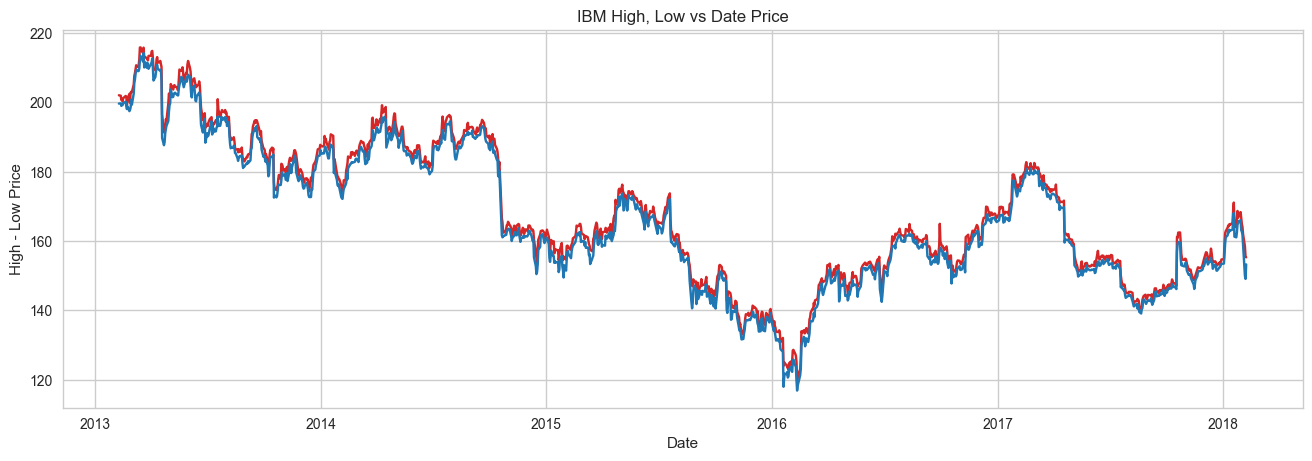

In [64]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.date, df["high"], color='tab:red')
plt.plot(df.date, df["low"], color='tab:blue')
plt.gca().set(title="IBM High, Low vs Date Price", xlabel='Date', ylabel='High - Low Price')
plt.show()

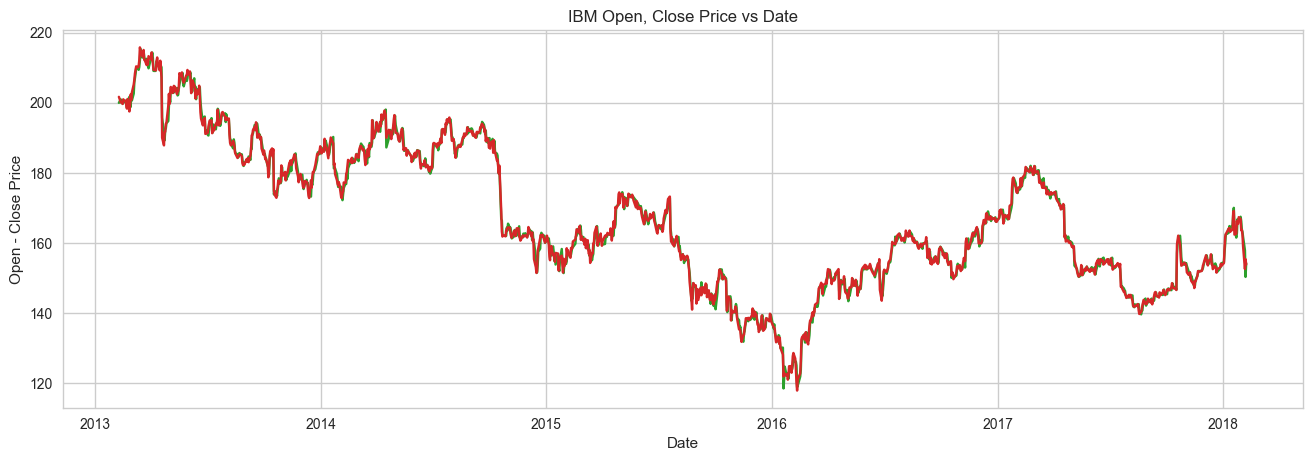

In [65]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(df.date, df["open"], color='tab:green')
plt.plot(df.date, df["close"], color='tab:red')
plt.gca().set(title="IBM Open, Close Price vs Date", xlabel='Date', ylabel='Open - Close Price')
plt.show()

In [66]:
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()
df.head(2)

date    open    high     low   close   volume Name  year month
0 2013-02-08  199.97  202.09  199.68  201.68  2893254  IBM  2013   Feb
1 2013-02-11  200.98  201.95  199.75  200.16  2944651  IBM  2013   Feb

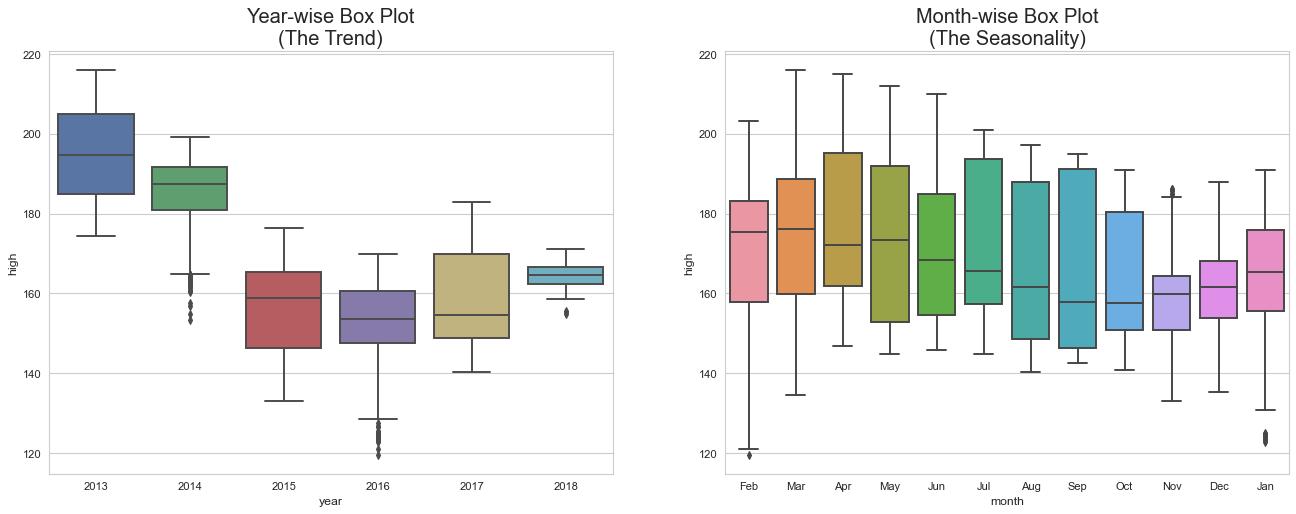

In [67]:
import seaborn as sns

df = pd.read_csv(url, parse_dates=['date'])
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='high', data=df, ax=axes[0])
sns.boxplot(x='month', y='high', data=df.loc[~df.year.isin([1991, 2008]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

We can observe seasonality from the data for sure. The trend over the year keeps on decresing and increasing. There is no specific trend to it. The 2015 falsh crash can also be seen in the historical data.

## Check for Stationarity

In [68]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(url, parse_dates=['date'])

result = adfuller(df.high.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.9446069364324774
p-value: 0.3113761289013385
Critial Values:
   1%, -3.4355754676859886
Critial Values:
   5%, -2.8638475772391665
Critial Values:
   10%, -2.5679985805677017


Since p-value(0.31) is higher than significance level(0.05), therefore time series is non-stationary.

## Degree of differencing (d)

In [115]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(16,12), 'figure.dpi':120})

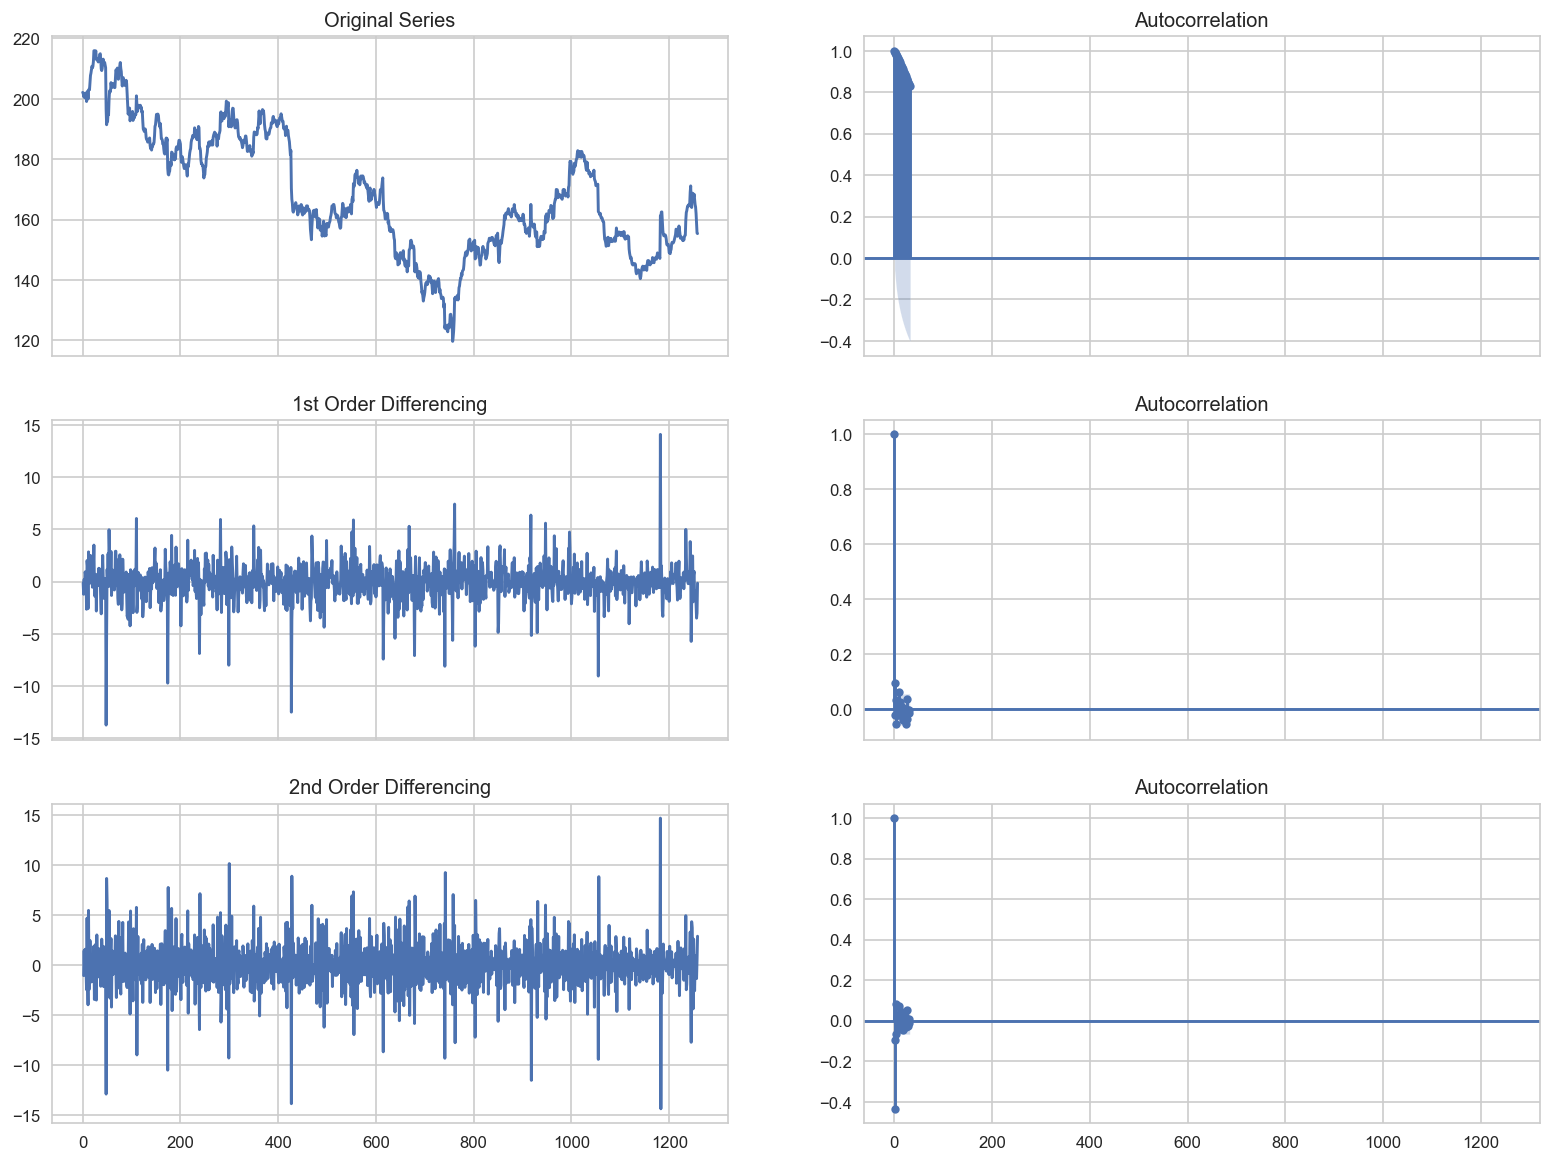

In [116]:
df = pd.read_csv(url, parse_dates=['date'])

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.high); axes[0, 0].set_title('Original Series')
plot_acf(df.high, ax=axes[0, 1])

axes[1, 0].plot(df.high.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.high.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.high.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.high.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.high.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -17.986291
p-value: 0.000000


In [72]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.high.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.409908
p-value: 0.000000


The time series reaches stationarity with just one differencing. Since p-value of first order differnceing is 0.00, 
we can choose the order of differencing to be 1 for now.

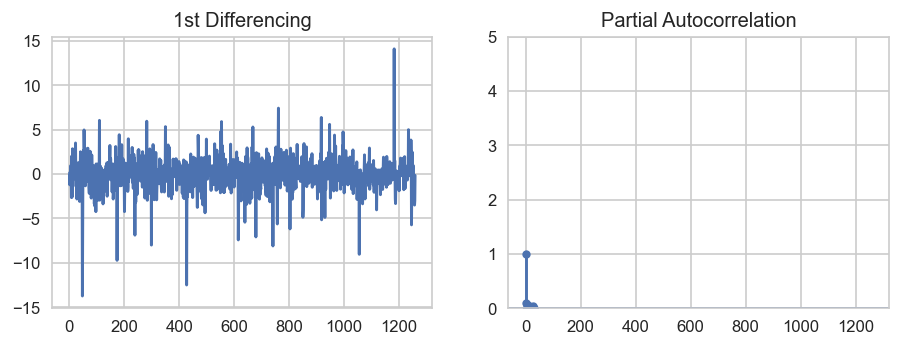

In [75]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.high.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.high.diff().dropna(), ax=axes[1])

plt.show()

We choose the p value to be 1.

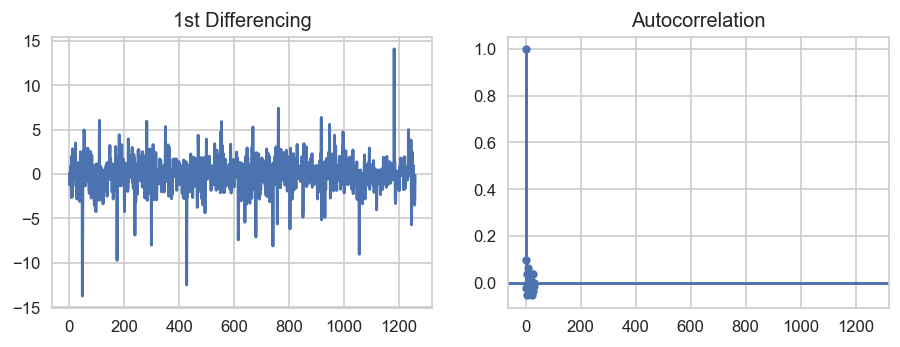

In [76]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

df = pd.read_csv(url, header=0)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.high.diff()); axes[0].set_title('1st Differencing')
plot_acf(df.high.diff().dropna(), ax=axes[1])

plt.show()

We choose the q value to be 1

### Arima

In [78]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df.high, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.high   No. Observations:                 1258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2485.308
Method:                       css-mle   S.D. of innovations              1.745
Date:                Sun, 13 Jun 2021   AIC                           4978.615
Time:                        13:27:05   BIC                           4999.165
Sample:                             1   HQIC                          4986.338
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0371      0.052     -0.711      0.477      -0.139       0.065
ar.L1.D.high    -0.5800      0.152     -3.823      0.000      -0.877      -0.283
ma.L1.D.high     0.6740      0.138      4.89

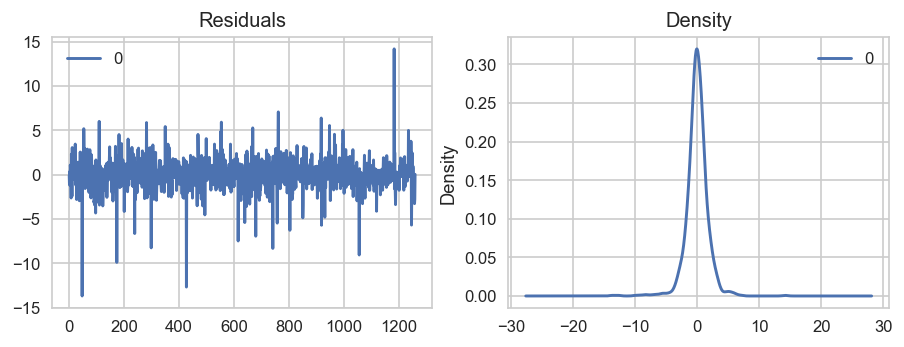

In [79]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

We can observe 0 mean and uinform variance.

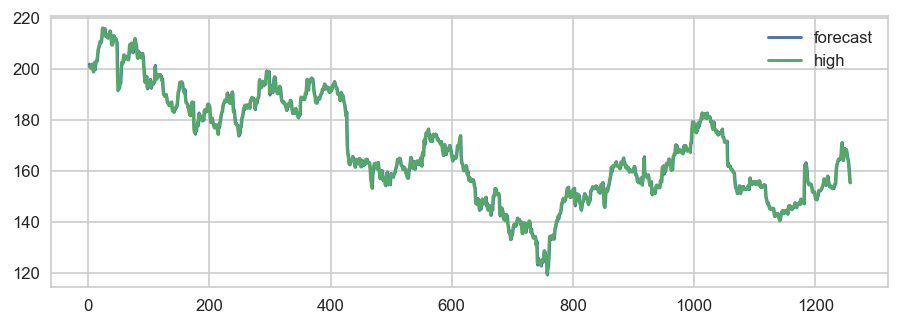

In [83]:
# Actual vs Fitted data
model_fit.plot_predict(dynamic=False)
plt.show()

In [84]:
from statsmodels.tsa.stattools import acf

# Train test split
train = df.high[:1200]
test = df.high[1200:]

                             ARIMA Model Results                              
Dep. Variable:                 D.high   No. Observations:                 1199
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2372.342
Method:                       css-mle   S.D. of innovations              1.750
Date:                Sun, 13 Jun 2021   AIC                           4752.684
Time:                        13:31:10   BIC                           4773.041
Sample:                             1   HQIC                          4760.352
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0427      0.053     -0.803      0.422      -0.147       0.061
ar.L1.D.high    -0.6242      0.138     -4.520      0.000      -0.895      -0.354
ma.L1.D.high     0.7076      0.125      5.67

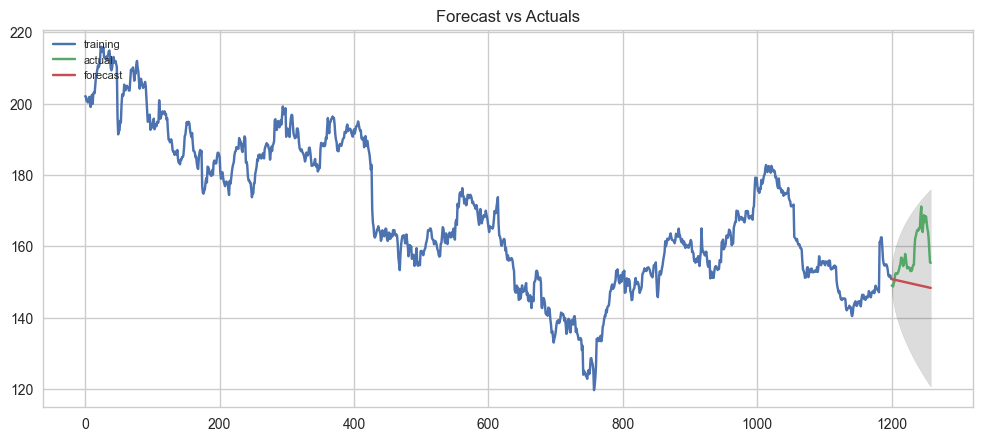

In [86]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(59, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [87]:
import numpy as np

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.05422676152081992,
 'me': -8.560555025038065,
 'mae': 8.800194651838037,
 'mpe': -0.05261929804232548,
 'rmse': 10.854345508530109,
 'acf1': 0.9481530182533913,
 'corr': -0.7914944111134081,
 'minmax': 0.054217970728864806}

                             ARIMA Model Results                              
Dep. Variable:                D2.high   No. Observations:                 1198
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2376.583
Method:                       css-mle   S.D. of innovations              1.754
Date:                Sun, 13 Jun 2021   AIC                           4761.167
Time:                        15:53:21   BIC                           4781.520
Sample:                             2   HQIC                          4768.834
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.334e-05      0.000      0.395      0.693      -0.000       0.000
ar.L1.D2.high     0.0867      0.029      3.012      0.003       0.030       0.143
ma.L1.D2.high    -1.0000      0.002   -4

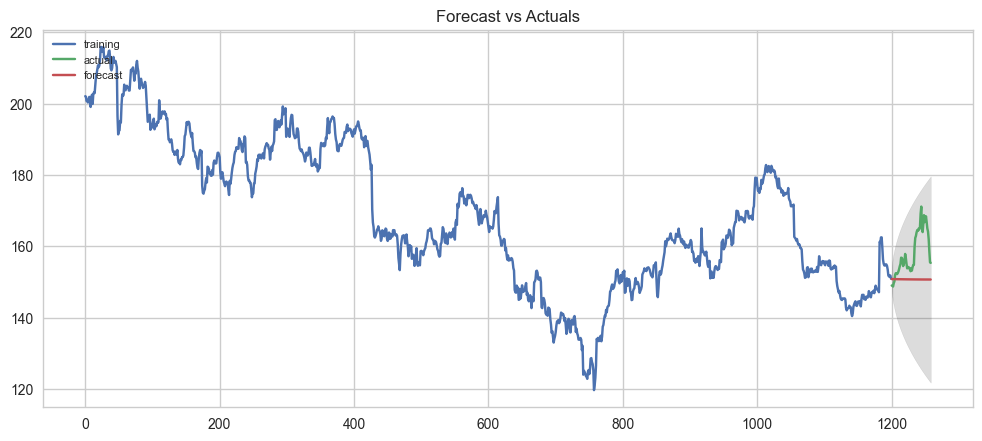

In [121]:
# Build Model
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(59, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [123]:
import numpy as np

forecast_accuracy(fc, test.values)

{'mape': 0.04710213526598502,
 'me': -7.399600660753065,
 'mae': 7.65364958433407,
 'mpe': -0.045398314000030415,
 'rmse': 9.598386552796194,
 'acf1': 0.9421483303669317,
 'corr': -0.7976640644108087,
 'minmax': 0.04709258554293427}

### Auto ARIMA

In [73]:
# ! pip install pmdarima
# ! pip install statsmodels

In [88]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd

df = pd.read_csv(url, header=0)

model_arima= pm.auto_arima(df.high,trace=True, error_action='ignore', 
                           test='adf',start_p=1,start_q=1,max_p=5,max_q=5,d=None,
                   suppress_warnings=True,stepwise=False,seasonal=False)

print(model_arima.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4991.265, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4981.004, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4981.689, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4981.069, Time=0.34 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4979.912, Time=0.51 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4981.736, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4981.757, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4978.615, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4980.164, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4981.307, Time=0.77 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4981.650, Time=1.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4982.550, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4980.119, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4981.908, Time=0.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4981.139, Time=2.35 sec
 ARIMA(3,1

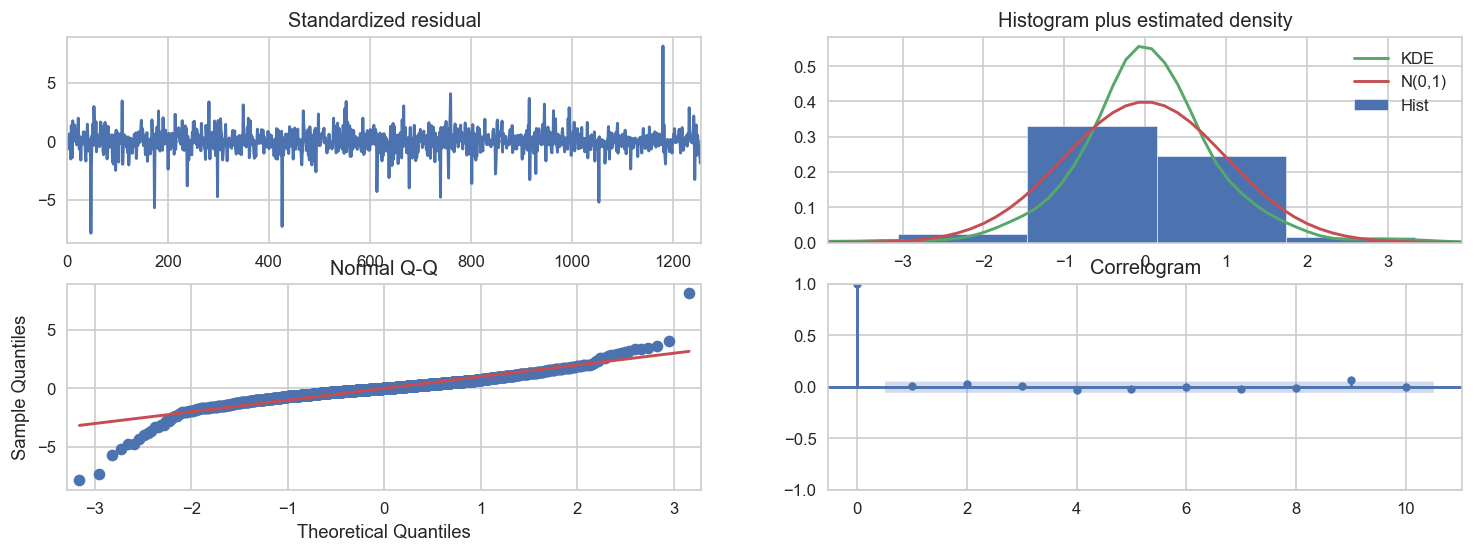

In [89]:
model_arima.plot_diagnostics(figsize=(15, 5))
plt.show()

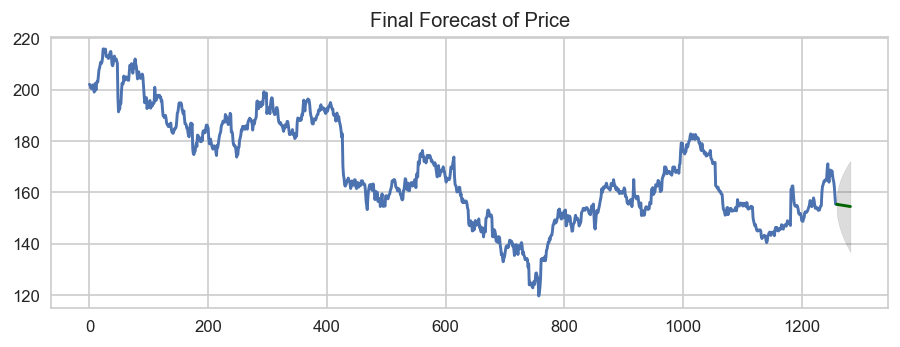

In [91]:
n_periods = 24

fc, confint = model_arima.predict(n_periods = n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.high), len(df.high)+n_periods)

fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(df.high)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Price")
plt.show()

From Automatic ARIMA, the best model was found to be (1,1,1), which confirms our previous findings with AIC value of 4978.615

Thank You